# Classificador de Gênero Musical utilizando letras
---

## Análise do conjunto de dados

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
bossa_nova = pd.read_csv('../input/lyrics/bossa_nova.csv')
bossa_nova['genre'] = 'bossa_nova'

funk = pd.read_csv('../input/lyrics/funk.csv')
funk['genre'] = 'funk'

gospel = pd.read_csv('../input/lyrics/gospel.csv')
gospel['genre'] = 'gospel'

sertanejo = pd.read_csv('../input/lyrics/sertanejo.csv')
sertanejo['genre'] = 'sertanejo'

df = pd.concat([bossa_nova, funk, gospel, sertanejo], ignore_index=True)
df = df.reindex(np.random.permutation(df.index)) # Shuffle the data

## Distribuição dos dados por gênero musical

In [3]:
df.head()

,lyric,genre
1179,"\nContando os plaque de 100, dentro de um Cit...",funk
2661,\nAh como quero te encontrar novamente\nEstou...,sertanejo
2238,"\nCada um por si, todos por nenhum\nNão param...",gospel
2183,\nPresença forte em mim\nEu posso dizer: Habi...,gospel
657,"\nOnce, I loved \nAnd I gave so much love to ...",bossa_nova


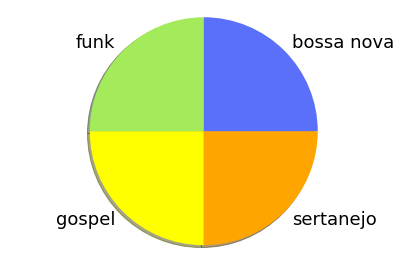

In [4]:
bossa_nova = sum(df.loc[:, 'genre'] == 'bossa_nova')
blue = '#5A6FFA'

funk = sum(df.loc[:, 'genre'] == 'funk')
green = '#A3EB5B'

gospel = sum(df.loc[:, 'genre'] == 'gospel')
yellow = '#FFFF00'

sertanejo = sum(df.loc[:, 'genre'] == 'sertanejo')
orange = '#FFA500'

#print(bossa_nova, funk, gospel, sertanejo)

from matplotlib import rcParams
rcParams['font.size'] = 18

piechart = plt.pie(
    (bossa_nova, funk, gospel, sertanejo),
    labels=('bossa nova', 'funk', 'gospel', 'sertanejo'),
    shadow=True,
    colors=(blue, green, yellow, orange),
)

plt.axis('equal')   
plt.tight_layout()

### Insight
---
É possível observar que o conjunto de múscas possui distribuição balanceada entre classes. Logo, é possível, ao assumir um modelo probabilístico para este problema, cada gênero possui probabilidade apriori equivalente.

## Análise de Frequência de Palavras

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import text 
from wordcloud import WordCloud

with open('../resources/stopwords.txt', 'r') as infile:
    stop_words = infile.read().splitlines()
stop_words = [w.strip(' ') for w in stop_words]

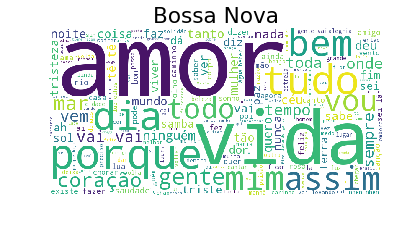

In [6]:
words = ' '.join(df.loc[df['genre']=='bossa_nova', 'lyric']).replace('\n', ' ').lower()

wordcloud = WordCloud( 
              stopwords=stop_words,
              background_color='white',
              width=800,
              height=400
    ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Bossa Nova')

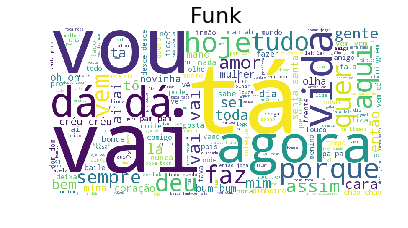

In [7]:
words = ' '.join(df.loc[df['genre']=='funk', 'lyric']).replace('\n', ' ').lower()

wordcloud = WordCloud( 
              stopwords=stop_words,
              background_color='white',
              width=800,
              height=400
    ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Funk')

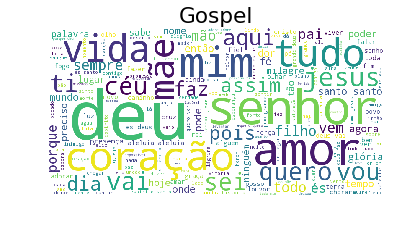

In [8]:
words = ' '.join(df.loc[df['genre']=='gospel', 'lyric']).replace('\n', ' ').lower()

wordcloud = WordCloud( 
              stopwords=stop_words,
              background_color='white',
              width=800,
              height=400
    ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Gospel')

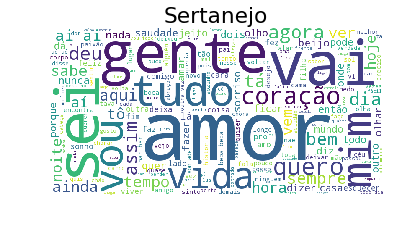

In [9]:
words = ' '.join(df.loc[df['genre']=='sertanejo', 'lyric']).replace('\n', ' ').lower()

wordcloud = WordCloud( 
              stopwords=stop_words,
              background_color='white',
              width=800,
              height=400
    ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Sertanejo')

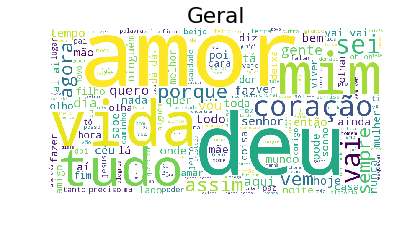

In [10]:
words = ' '.join(df.loc[:, 'lyric']).replace('\n', ' ').lower()

wordcloud = WordCloud( 
                  stopwords=stop_words,
                  background_color='white',
                  width=800,
                  height=400
            ).generate(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.title('Geral')

### Insight
---
É possível observar que alguns gêneros possuem palavras com alta frequência em comum. Como exemplo, as palavras 'amor' e 'vida' compartilham as maiores citações tanto no gênero 'Bossa Nova' quanto 'Sertanejo'. Deste modo, elas podem oferecem pouco valor descritivo no modelo probabilístico, sendo necessário adotar uma métrica de contagem que pondere tal cenário.

## Preparando os dados para construção do modelo

In [11]:
#df['lyric'] = df['lyric'].str.replace('\n', ' ')
#df.to_csv('./input/dataset_.csv', index=False)

## Conclusão
---

Conforme supracitado, o conjunto de dados possui quatro classes balanceadas, as quais contam cada Ainda, o conjunto mostra que distintos gêneros musicais compartilham as mesmas palavras com alta frequência em suas letras. 
Diante do problema de classificação textual multirótulo, RUSSEL & NORVIG destacam que modelos baseados em distribuição de probabilidades possuem desempenho satisfatóriona resolução e conta com simplicidade de implementação. Como potencial deficiência, os autores citam que tais modelos desconsiderem o contexto semântico dos textos, o que pode oferecer um conhecimento relevante dentro de cada classe (assumindo que cada gênero possui um  'estilo' próprio de composição, por exemplo).<br>
Portanto, no contexto deste trabalho, diante das variáveis impostas (escopo, deadline, dados, etc.), será implementado o modelo Naive Bayes, dada sua simplicidade e eficácia, presente na literatura da área, para a resolução do problema de classificação de textos. Diante deste modelo, será adotada a métrica de frenquência de termo TF-ID (term frequency inverse document), que lida com a alta frequência de termos presentes em distintas classes.

## Referências
---
* [RUSSSEL, S; NORVIG, P. Inteligência Artificial, 3ª Ed. - Capítulo 22](https://www.amazon.com.br/Intelig%C3%AAncia-Artificial-Peter-Norvig/dp/8535237011)
* https://arxiv.org/pdf/1611.00138.pdf
* https://sebastianraschka.com/blog/2014/musicmood.html#naive-bayes---why